In [1]:
!pip install xgboost
!pip install lightgbm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
tdr = pd.read_csv('한국가스공사_도시가스 TDR_20201231.csv', encoding='cp949')
time = pd.read_csv('한국가스공사_시간별 공급량_20181231.csv', encoding='cp949')
year = pd.read_csv('한국가스공사_연도별 일일 최대 공급량_20210108.csv', encoding='cp949')
month = pd.read_csv('한국가스공사_월별 일평균 천연가스 공급량_20201231.csv', encoding='cp949')
area = pd.read_csv('한국가스공사_월별 지역본부별 천연가스 공급량_20201231.csv', encoding='utf-8')
mm = pd.read_csv('한국가스공사_천연가스 최대,최소 공급량_12_31_2020.csv', encoding='cp949')

# tdr(연중 최대사용량/최저사용량)

In [4]:
tdr

,연도,도시가스
0,1991,4.8
1,1992,5.7
2,1993,5.6
3,1994,6.5
4,1995,6.5
5,1996,6.1
6,1997,4.9
7,1998,4.5
8,1999,4.6
9,2000,4.0


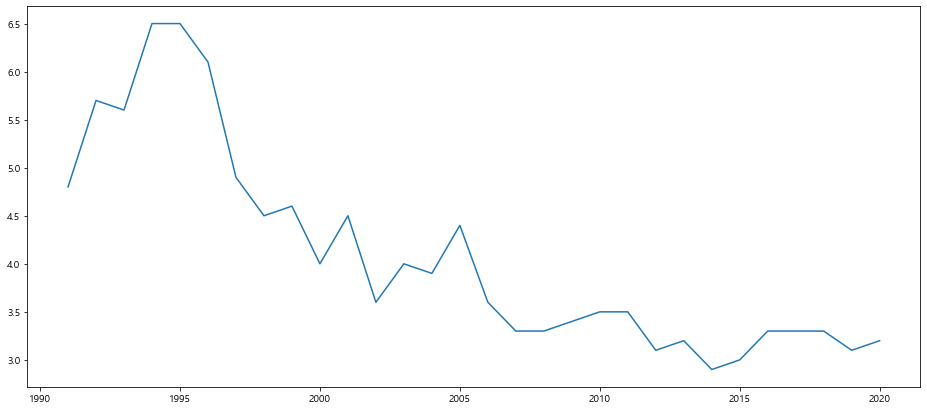

In [5]:
plt.figure(figsize=(16,7))
plt.plot(tdr['연도'],tdr['도시가스'])

# 시간별

In [6]:
time.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [7]:
time['구분'].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

In [8]:
time=pd.get_dummies(data = time, columns = ['구분'])

In [9]:
time['연월일'] = pd.to_datetime(time['연월일'])

In [10]:
time['year'] = time['연월일'].dt.year
time['month'] = time['연월일'].dt.month
time['day'] = time['연월일'].dt.day
time['weekday'] = time['연월일'].dt.weekday

In [26]:
time=pd.get_dummies(data = time, columns = ['month'])

In [28]:
time=pd.get_dummies(data = time, columns = ['day'])

In [29]:
time

,연월일,시간,공급량,구분_A,구분_B,구분_C,구분_D,구분_E,구분_G,구분_H,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,2013-01-01,1,2497.129,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-01-01,2,2363.265,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013-01-01,3,2258.505,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-01-01,4,2243.969,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013-01-01,5,2344.105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,681.033,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
368084,2018-12-31,21,669.961,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
368085,2018-12-31,22,657.941,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
368086,2018-12-31,23,610.953,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [31]:
time.columns

Index(['연월일', '시간', '공급량', '구분_A', '구분_B', '구분_C', '구분_D', '구분_E', '구분_G',
       '구분_H', 'year', 'weekday', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'day_31'],
      dtype='object')

In [38]:
heatmap_data = time[['시간', '구분_A', '구분_B', '구분_C', '구분_D', '구분_E', '구분_G',
       '구분_H', 'year', 'weekday', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'day_31', '공급량']]

<AxesSubplot:title={'center':'Person Correlation of Features'}>

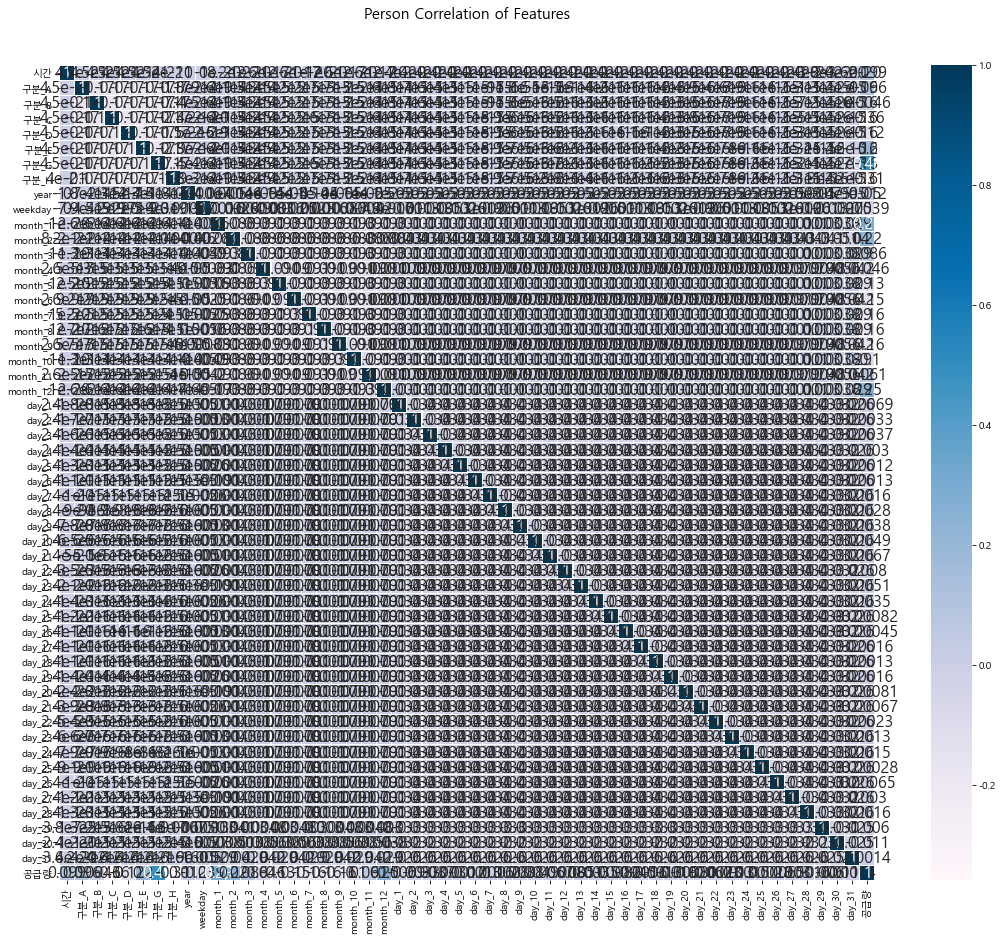

In [39]:
colormap = plt.cm.PuBu
plt.figure(figsize=(20, 15))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [12]:
a=['A','B','C','D','E','G','H']
for i in range(0,25):
    for j in a:
        globals()['time_{}_{}'.format(i,j)]=time[(time['시간']==i)&time['구분_'+j]==1]

In [13]:
time_1_A

,연월일,시간,공급량,구분_A,구분_B,구분_C,구분_D,구분_E,구분_G,구분_H,year,month,day,weekday
0,2013-01-01,1,2497.129,1,0,0,0,0,0,0,2013,1,1,1
24,2013-01-02,1,2345.481,1,0,0,0,0,0,0,2013,1,2,2
48,2013-01-03,1,2968.249,1,0,0,0,0,0,0,2013,1,3,3
72,2013-01-04,1,3067.361,1,0,0,0,0,0,0,2013,1,4,4
96,2013-01-05,1,2918.889,1,0,0,0,0,0,0,2013,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315408,2018-12-27,1,2310.778,1,0,0,0,0,0,0,2018,12,27,3
315432,2018-12-28,1,2783.857,1,0,0,0,0,0,0,2018,12,28,4
315456,2018-12-29,1,2719.575,1,0,0,0,0,0,0,2018,12,29,5
315480,2018-12-30,1,2512.497,1,0,0,0,0,0,0,2018,12,30,6


In [17]:
mon1=time[time['month']==1]
mon2=time[time['month']==2]
mon3=time[time['month']==3]
mon4=time[time['month']==4]
mon5=time[time['month']==5]
mon6=time[time['month']==6]
mon7=time[time['month']==7]
mon8=time[time['month']==8]
mon9=time[time['month']==9]
mon10=time[time['month']==10]
mon11=time[time['month']==11]
mon12=time[time['month']==12]

In [19]:
from collections import Counter

def detect_outliers(df):
    outlier_indices = []
    Q1 = np.percentile(df['공급량'], 25)
    Q3 = np.percentile(df['공급량'], 75)
    IQR = Q3 - Q1
        
    outlier_step = 1.5 * IQR
        
    outlier_list_col = df[(df['공급량'] < Q1 - outlier_step) | (df['공급량'] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    
    
    return outlier_indices

In [20]:
Outliers_to_drop = detect_outliers(mon3)
Outliers_to_drop

Counter({45295: 1,
         45319: 1,
         45320: 1,
         45343: 1,
         45463: 1,
         45703: 1,
         106639: 1,
         106653: 1,
         106663: 1,
         106664: 1,
         106675: 1,
         106676: 1,
         106687: 1,
         106688: 1,
         106699: 1,
         106700: 1,
         106759: 1,
         106760: 1,
         106771: 1,
         106772: 1,
         106783: 1,
         106784: 1,
         106855: 1,
         167887: 1,
         167935: 1,
         167936: 1,
         167937: 1,
         167946: 1,
         167947: 1,
         167948: 1,
         167949: 1,
         167950: 1,
         167959: 1,
         167960: 1,
         167971: 1,
         167972: 1,
         167973: 1,
         167983: 1,
         167984: 1,
         168066: 1,
         168067: 1,
         168068: 1,
         168069: 1,
         168070: 1,
         168078: 1,
         168079: 1,
         168080: 1,
         168081: 1,
         168082: 1,
         168090: 1,
      

In [21]:
time.loc[Outliers_to_drop]

,연월일,시간,공급량,구분_A,구분_B,구분_C,구분_D,구분_E,구분_G,구분_H,year,month,day,weekday
45295,2013-03-04,8,3970.093,0,0,0,0,0,1,0,2013,3,4,0
45319,2013-03-05,8,4242.461,0,0,0,0,0,1,0,2013,3,5,1
45320,2013-03-05,9,3917.941,0,0,0,0,0,1,0,2013,3,5,1
45343,2013-03-06,8,3983.005,0,0,0,0,0,1,0,2013,3,6,2
45463,2013-03-11,8,3865.517,0,0,0,0,0,1,0,2013,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352483,2018-03-21,20,4065.234,0,0,0,0,0,1,0,2018,3,21,2
352484,2018-03-21,21,3972.834,0,0,0,0,0,1,0,2018,3,21,2
352485,2018-03-21,22,3877.832,0,0,0,0,0,1,0,2018,3,21,2
352495,2018-03-22,8,3963.642,0,0,0,0,0,1,0,2018,3,22,3


In [22]:
time = time.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [40]:
train_time, test_time = train_test_split(time, test_size= 0.2 ,
                                         random_state = 0, shuffle = True)

In [41]:
val_time, test_time = train_test_split(time, test_size= 0.5 ,
                                         random_state = 0, shuffle = True)

In [42]:
features=['시간', '구분_A', '구분_B', '구분_C', '구분_D', '구분_E', '구분_G',
       '구분_H', 'year', 'weekday', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'day_31']

In [43]:
train_x = train_time[features]
train_y = train_time['공급량']

test_x = test_time[features]
test_y = test_time['공급량']


val_x = val_time[features]
val_y = val_time['공급량']

# XGB

In [44]:
from xgboost import XGBRegressor

train = xgb.DMatrix(data=train_x, label = train_y)
val = xgb.DMatrix(data=val_x, label = val_y)
wlist = [(train, 'train'), (val,'eval')]

params = {
    'learning_rate': 0.05,
    'objective': 'reg:squarederror',
    'metric':'mae', 
    'seed':42
}
 

model = xgb.train( params, train, 500, evals=wlist, verbose_eval=20, early_stopping_rounds=100)

[09:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "metric" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:1266.18958	eval-rmse:1264.60632
[20]	train-rmse:578.08331	eval-rmse:577.28424
[40]	train-rmse:364.33429	eval-rmse:363.47525
[60]	train-rmse:284.12170	eval-rmse:283.25909
[80]	train-rmse:250.26132	eval-rmse:249.39497
[100]	train-rmse:232.16928	eval-rmse:231.30512
[120]	train-rmse:221.05579	eval-rmse:220.17618
[140]	train-rmse:213.04196	eval-rmse:212.18854
[160]	train-rmse:206.29813	eval-rmse:205.43863
[180]	train-rmse:201.42973	eval-rmse:200.58035
[200]	train-rmse:197.16586	eval-rmse:196.34715
[220]	train-rmse:193.58423	eval-rmse:192.83095
[240]	train-rmse:189.73850	eval-rmse:188.96417
[260]	t

In [45]:
test_xD = xgb.DMatrix(test_x)

In [46]:
test_y= pd.DataFrame(test_y)
test_y

,공급량
341261,1393.327
209561,170.978
254423,1778.549
25367,162.178
271447,285.617
...,...
114282,544.500
349165,1140.438
100740,901.757
251046,562.977


In [47]:
test_y.iloc[:]

,공급량
341261,1393.327
209561,170.978
254423,1778.549
25367,162.178
271447,285.617
...,...
114282,544.500
349165,1140.438
100740,901.757
251046,562.977


In [48]:
test_y1 = model.predict(test_xD)
test_y1=pd.DataFrame(test_y1)
test_y=pd.DataFrame(test_y)

In [49]:
def nmae(true_df, pred_df):
#    target_idx = true_df.iloc[:,0]
#    pred_df = pred_df[pred_df.iloc[:,0].isin(target_idx)]
#    pred_df = pred_df.sort_values(by=[pred_df.columns[0]], ascending=[True])
#    true_df = true_df.sort_values(by=[true_df.columns[0]], ascending=[True])
    
    true = true_df.iloc[:].to_numpy()
    pred = pred_df.iloc[:].to_numpy()
    
    score = np.mean((np.abs(true-pred))/true)
    
    return score

In [50]:
nmae(test_y,test_y1)

0.4339602199241304

# LGBM

In [51]:
d_train = lgb.Dataset(train_x, train_y)
d_val = lgb.Dataset(val_x, val_y)

params = {
    'objective': 'regression',
    'metric':'mae',
    'seed':42
}

model1 = lgb.train(params, d_train, 500, d_val, verbose_eval=20, early_stopping_rounds=10)

C:\Users\ie\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ie\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 294470, number of used features: 53
[LightGBM] [Info] Start training from score 947.496189
Training until validation scores don't improve for 10 rounds
[20]	valid_0's l1: 213.63
[40]	valid_0's l1: 144.561
[60]	valid_0's l1: 127.924
[80]	valid_0's l1: 119.643
[100]	valid_0's l1: 113.479
[120]	valid_0's l1: 109.503
[140]	valid_0's l1: 106.307
[160]	valid_0's l1: 103.456
[180]	valid_0's l1: 101.366
[200]	valid_0's l1: 99.2563
[220]	valid_0's l1: 97.3723
[240]	valid_0's l1: 95.2591
[260]	valid_0's l1: 93.2688
[280]	valid_0's l1: 91.8258
[300]	valid_0's l1: 90.1556
[320]	valid_0's l1: 88.0024
[340]	valid_0's l1: 86.476
[360]	valid_0's l1: 84.5985
[380]	valid_0's l1: 83.0764
[4

In [52]:
test_y2 = model1.predict(test_x)

In [53]:
test_y2=pd.DataFrame(test_y2)

In [54]:
nmae(test_y,test_y2)

0.47842679379910896

# 년도별

In [184]:
year

,날짜(발전),공급량(발전),날짜(도시가스),공급량(도시가스)
0,2009-12-18,55799,2009-12-18,94277
1,2010-12-24,67628,2010-01-13,104767
2,2011-01-13,72800,2011-01-17,106836
3,2012-12-27,74811,2012-02-02,112192
4,2013-12-20,76961,2013-01-03,115117
5,2014-01-10,79948,2014-12-17,103013
6,2015-02-09,70516,2015-02-09,94215
7,2016-01-25,73667,2016-01-25,110417
8,2017-12-12,90084,2017-12-13,109715
9,2018-01-26,95908,2018-01-26,128714


In [185]:
year['총합']= year['공급량(발전)']+year['공급량(도시가스)']

In [191]:
year

,날짜(발전),공급량(발전),날짜(도시가스),공급량(도시가스),총합
0,2009-12-18,55799,2009-12-18,94277,150076
1,2010-12-24,67628,2010-01-13,104767,172395
2,2011-01-13,72800,2011-01-17,106836,179636
3,2012-12-27,74811,2012-02-02,112192,187003
4,2013-12-20,76961,2013-01-03,115117,192078
5,2014-01-10,79948,2014-12-17,103013,182961
6,2015-02-09,70516,2015-02-09,94215,164731
7,2016-01-25,73667,2016-01-25,110417,184084
8,2017-12-12,90084,2017-12-13,109715,199799
9,2018-01-26,95908,2018-01-26,128714,224622


<AxesSubplot:>

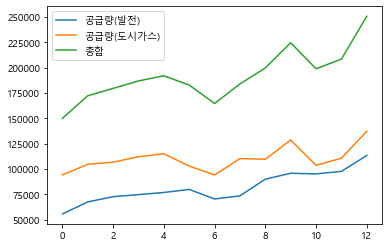

In [192]:
year.plot()

# 월별

In [160]:
month

,단위(Ton),1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2017,135090,135299,110430,80656,66917,74456,80432,73353,66251,69464,120512,159175
1,2018,168335,155493,124240,104391,88658,87822,89148,88223,72283,95837,117538,153090
2,2019,157563,141622,118815,106413,83858,77248,105601,86183,77179,85633,119653,155943
3,2020,167138,158943,135775,104649,79721,87007,92255,103153,101055,108353,132915,18167


# 지역별

In [132]:
area.head()

,연월,서울,인천,경기,강원,충청,전북,광주,대구,부산,제주
0,Jan-16,1110948,539952,884621,77545,275615,230249,220168,355646,553342,NaN
1,Feb-16,911323,441262,769085,63447,231933,178604,200121,299373,462628,NaN
2,Mar-16,718859,387889,682050,55284,197986,193081,210464,271042,464287,NaN
3,Apr-16,417299,288915,453910,33572,106757,137068,157493,208573,319444,NaN
4,May-16,354428,278423,375331,44665,119412,153391,145237,198135,307294,NaN


In [139]:
del area['제주']

In [140]:
area

,연월,서울,인천,경기,강원,충청,전북,광주,대구,부산
0,Jan-16,1110948,539952,884621,77545,275615,230249,220168,355646,553342
1,Feb-16,911323,441262,769085,63447,231933,178604,200121,299373,462628
2,Mar-16,718859,387889,682050,55284,197986,193081,210464,271042,464287
3,Apr-16,417299,288915,453910,33572,106757,137068,157493,208573,319444
4,May-16,354428,278423,375331,44665,119412,153391,145237,198135,307294
5,Jun-16,351269,367304,401342,41104,109522,149399,138729,194935,310203
6,Jul-16,402772,445710,376995,51173,107751,179305,146867,185884,388765
7,Aug-16,421003,427250,418494,48136,99393,179948,121880,191966,358416
8,Sep-16,359315,356851,362632,28905,100447,165998,114869,186283,354410
9,Oct-16,468053,485370,401488,39585,134042,193100,140243,209424,430838


In [26]:
area.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
연월,Jan-16,Feb-16,Mar-16,Apr-16,May-16,Jun-16,Jul-16,Aug-16,Sep-16,Oct-16,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20
서울,1110948,911323,718859,417299,354428,351269,402772,421003,359315,468053,...,831554,537303,373143,394160,479846,532177,461306,620140,831239,1184955
인천,539952,441262,387889,288915,278423,367304,445710,427250,356851,485370,...,402468,303158,218414,294017,295606,442312,398901,397655,439241,580969
경기,884621,769085,682050,453910,375331,401342,376995,418494,362632,401488,...,878238,644064,511769,493857,530427,576234,492021,563239,786199,1158498
강원,77545,63447,55284,33572,44665,41104,51173,48136,28905,39585,...,95481,66596,52546,53810,54858,65711,69376,61120,94770,147138
충청,275615,231933,197986,106757,119412,109522,107751,99393,100447,134042,...,215960,180792,125887,120085,119057,124928,126417,126886,191761,295907
전북,230249,178604,193081,137068,153391,149399,179305,179948,165998,193100,...,206269,151790,113151,164283,161215,195813,196777,212470,186592,307649
광주,220168,200121,210464,157493,145237,138729,146867,121880,114869,140243,...,269945,216372,174850,178352,182535,181924,196296,193099,227163,296531
대구,355646,299373,271042,208573,198135,194935,185884,191966,186283,209424,...,286413,228021,165336,172351,180027,186830,194697,212882,281628,378673
부산,553342,462628,464287,319444,307294,310203,388765,358416,354410,430838,...,615914,474795,399198,391135,432308,466854,500720,529862,597959,820778


In [143]:
b=area.describe()
b

,서울,인천,경기,강원,충청,전북,광주,대구,부산
count,6.000000e+01,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,6.966163e+05,389564.666667,6.511786e+05,76786.800000,171622.566667,202090.016667,197696.983333,242337.733333,511485.900000
std,2.735010e+05,88999.625166,2.290027e+05,30136.992029,67889.962094,46244.471892,45860.849741,67743.910333,135622.426753
min,3.512690e+05,211570.000000,3.317900e+05,28905.000000,89995.000000,113151.000000,114869.000000,148228.000000,290538.000000
25%,4.780748e+05,316103.750000,4.688955e+05,55533.000000,117821.750000,164617.500000,165160.000000,185581.000000,422928.000000
50%,5.676945e+05,398278.000000,5.718970e+05,66845.000000,137967.500000,196295.000000,196263.000000,211510.500000,495213.500000
75%,8.886475e+05,446824.500000,8.201528e+05,95690.000000,224548.250000,225616.250000,221916.750000,288347.750000,578443.500000
max,1.306019e+06,580969.000000,1.158498e+06,150852.000000,316138.000000,326679.000000,296531.000000,385199.000000,820778.000000


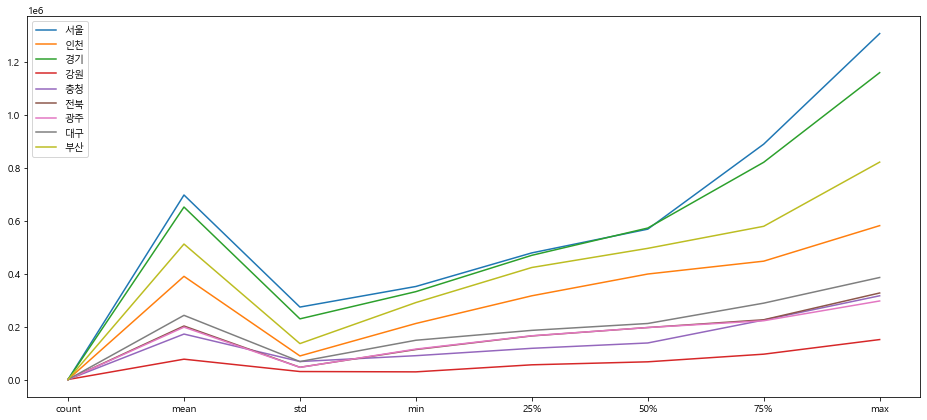

In [144]:
plt.figure(figsize=(16,7))
plt.plot(b)
plt.legend(b)

None


# 최대,최소

In [21]:
mm.head()

,년도,구분,최대공급월,최대공급량,최소공급월,최소공급량
0,2016,발전,11,1675857,4,875314
1,2016,시설이용,7,130597,4,47120
2,2016,도시가스,1,2623661,8,786742
3,2016,직공급,1,21957,9,13611
4,2016,총공급량,1,4270043,5,1992217


In [159]:
mm[mm['구분']=='총공급량']

,년도,구분,최대공급월,최대공급량,최소공급월,최소공급량
4,2016,총공급량,1,4270043,5,1992217
9,2017,총공급량,12,4934417,9,1987523
14,2018,총공급량,1,5218376,9,2168497
19,2019,총공급량,1,4884467,9,2315358
24,2020,총공급량,12,5216968,5,2161085
